In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

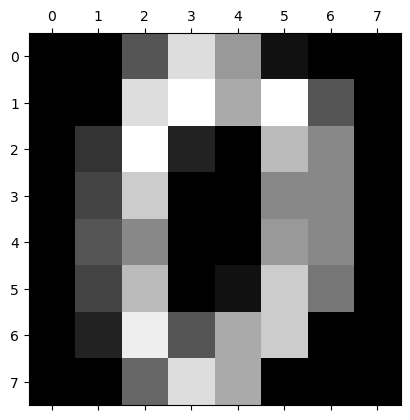

In [11]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()

In [16]:
digits = load_digits()
df = pd.DataFrame(np.column_stack([digits['data'], digits['target']]), columns=digits['feature_names'] + ['target'])

In [17]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis= 'columns')
y = df['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.svm import SVC
model = SVC(C=100, kernel= 'poly')

In [50]:
model.fit(X_train, y_train)

SVC(C=100, kernel='poly')

In [51]:
model.score(X_test, y_test)

0.9861111111111112

### K nearest neighbors classification

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9861111111111112

In [64]:
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

In [65]:
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 40]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

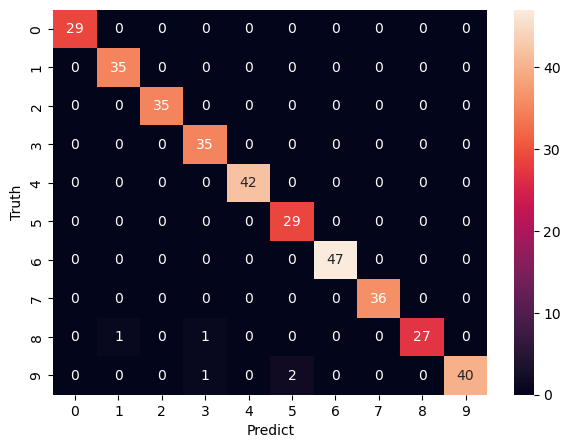

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn 
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot= True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       0.97      1.00      0.99        35
         2.0       1.00      1.00      1.00        35
         3.0       0.95      1.00      0.97        35
         4.0       1.00      1.00      1.00        42
         5.0       0.94      1.00      0.97        29
         6.0       1.00      1.00      1.00        47
         7.0       1.00      1.00      1.00        36
         8.0       1.00      0.93      0.96        29
         9.0       1.00      0.93      0.96        43

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

